In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url='https://raw.githubusercontent.com/rashakil-ds/10-ML-Projects-for-Resume/refs/heads/main/Datasets/BRCA%20Data.csv'
df=pd.read_csv(url)

In [207]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [210]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [212]:
df.dropna(inplace=True)

In [214]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [216]:
df.shape

(317, 16)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [220]:
df['Patient_Status'].value_counts()

Patient_Status
Alive    255
Dead      62
Name: count, dtype: int64

In [222]:
import plotly.express as px

In [224]:
def pie_chart(column_name):
    values_list=df[column_name].value_counts().values
    #print(values)
    index=values=df[column_name].value_counts().index
    #print(index)
    name=values=df[column_name].value_counts().index.name
    #print(name)
    fig=px.pie(data_frame=df,values=values_list,names=index,title=name)
    fig.show()

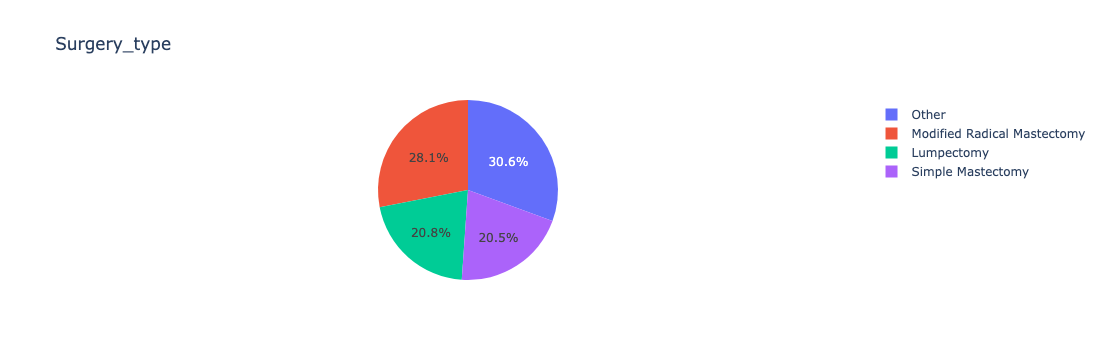

In [226]:
pie_chart('Surgery_type')

fig,ax=plt.subplots(nrows=6,ncols=3,figsize=(14,7))
ax=ax.flatten()
for i,col in enumerate(df.columns):
    values_list=df[col].value_counts().values
    index=values=df[col].value_counts().index
    name=values=df[col].value_counts().index.name
    ax[i].pie(values_list,labels=index,autopct='%1.1f%%',radius=1.5)
for i in range(len(df.columns),len(ax)):
    ax[i].axis('off')
plt.tight_layout()
plt.show()

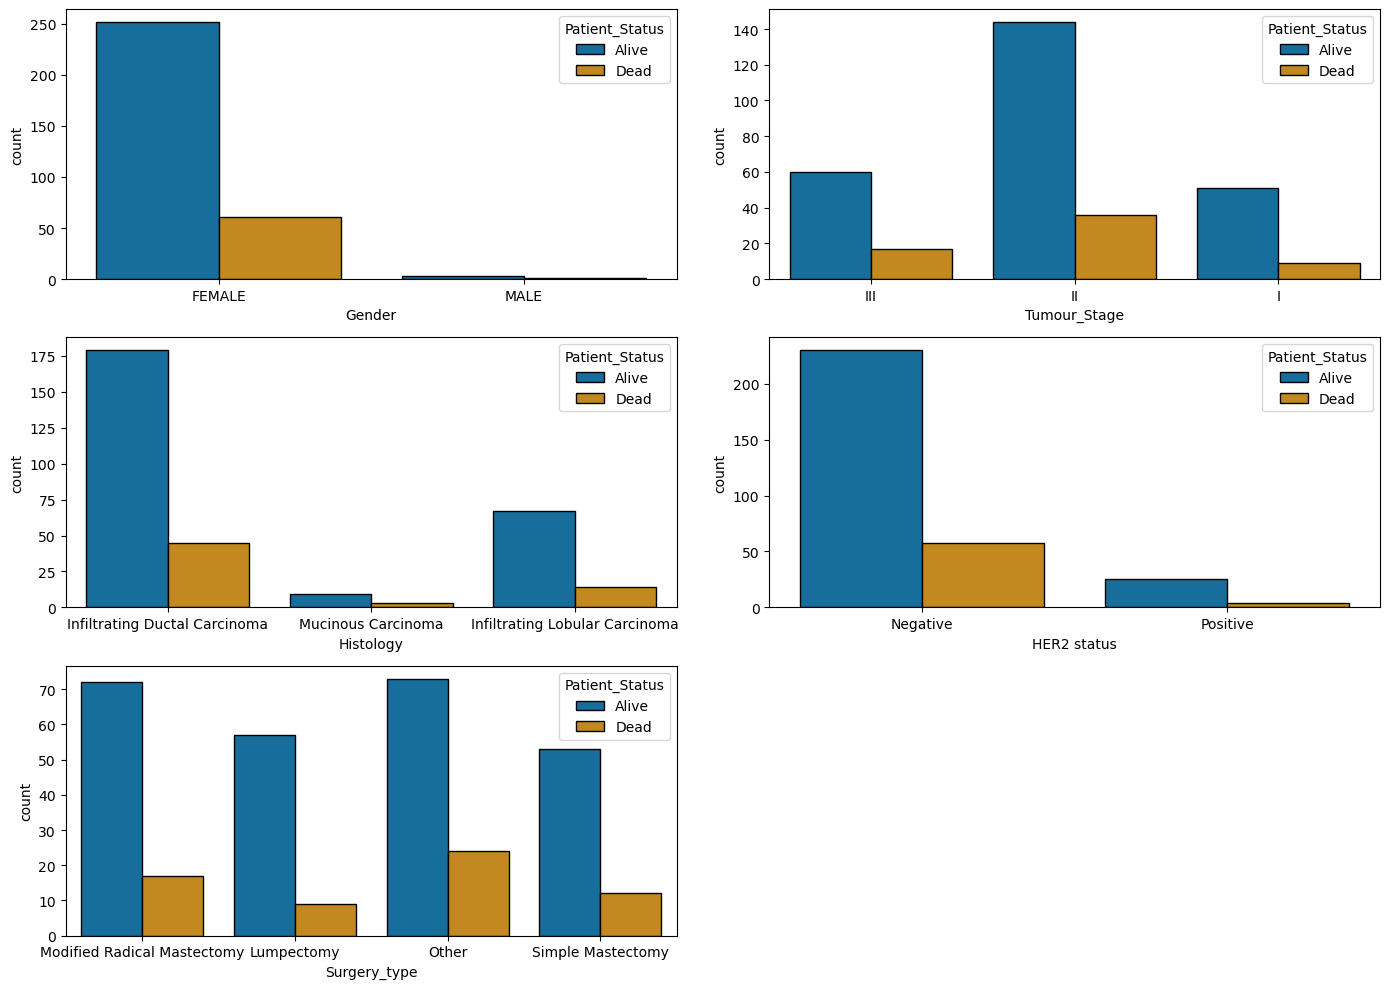

In [229]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(14, 10))
count_columns_df=df[['Gender','Tumour_Stage','Histology','HER2 status','Surgery_type']]
axes=ax.flatten()
for i,col in enumerate(count_columns_df.columns):
    sns.countplot(x=count_columns_df[col],
                  hue=df['Patient_Status'],
                  palette='colorblind',
                  edgecolor='black',
                  ax=axes[i])
for i in range(len(count_columns_df.columns),len(axes)):
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [231]:
df['Date_of_Surgery']=pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit']=pd.to_datetime(df['Date_of_Last_Visit'])

In [233]:
df.insert(14,'surgery to last visit duration in month',((df['Date_of_Last_Visit'] - df['Date_of_Surgery']) / pd.Timedelta(days=30)).round().astype(int))

In [235]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,surgery to last visit duration in month,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,5,2017-06-19,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,19,2018-11-09,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,9,2018-06-09,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,6,2017-07-12,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,26,2019-06-27,Dead


In [237]:
df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [239]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [241]:
df['Tumour_Stage_Encoded']=enc.fit_transform(df[['Tumour_Stage']])

In [243]:
df.insert(1,'Male',pd.get_dummies(df['Gender'],dtype=float,drop_first=True))

In [245]:
df=pd.get_dummies(df,columns=['Histology','HER2 status','Surgery_type','Patient_Status'],dtype=float,drop_first=True)

In [247]:
df.head() #Patient_Status 1 means Dead 0 means Alive

,Age,Male,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,surgery to last visit duration in month,Tumour_Stage_Encoded,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
0,36.0,0.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,5,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,43.0,0.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,19,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,69.0,0.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,9,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56.0,0.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56.0,0.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,26,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [249]:
df.drop(['Gender','Tumour_Stage','surgery to last visit duration in month'],axis=1,inplace=True)

In [251]:
target_column=df.pop('Patient_Status_Dead')

In [253]:
df.shape

(317, 13)

In [257]:
df.insert(13,'Patient_Status_Dead',target_column)

In [261]:
df.head()

,Age,Male,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_Encoded,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
0,36.0,0.0,0.080353,0.42638,0.54715,0.273680,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,43.0,0.0,-0.420320,0.57807,0.61447,-0.031505,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,69.0,0.0,0.213980,1.31140,-0.32747,-0.234260,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56.0,0.0,0.345090,-0.21147,-0.19304,0.124270,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56.0,0.0,0.221550,1.90680,0.52045,-0.311990,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [263]:
df.shape

(317, 14)

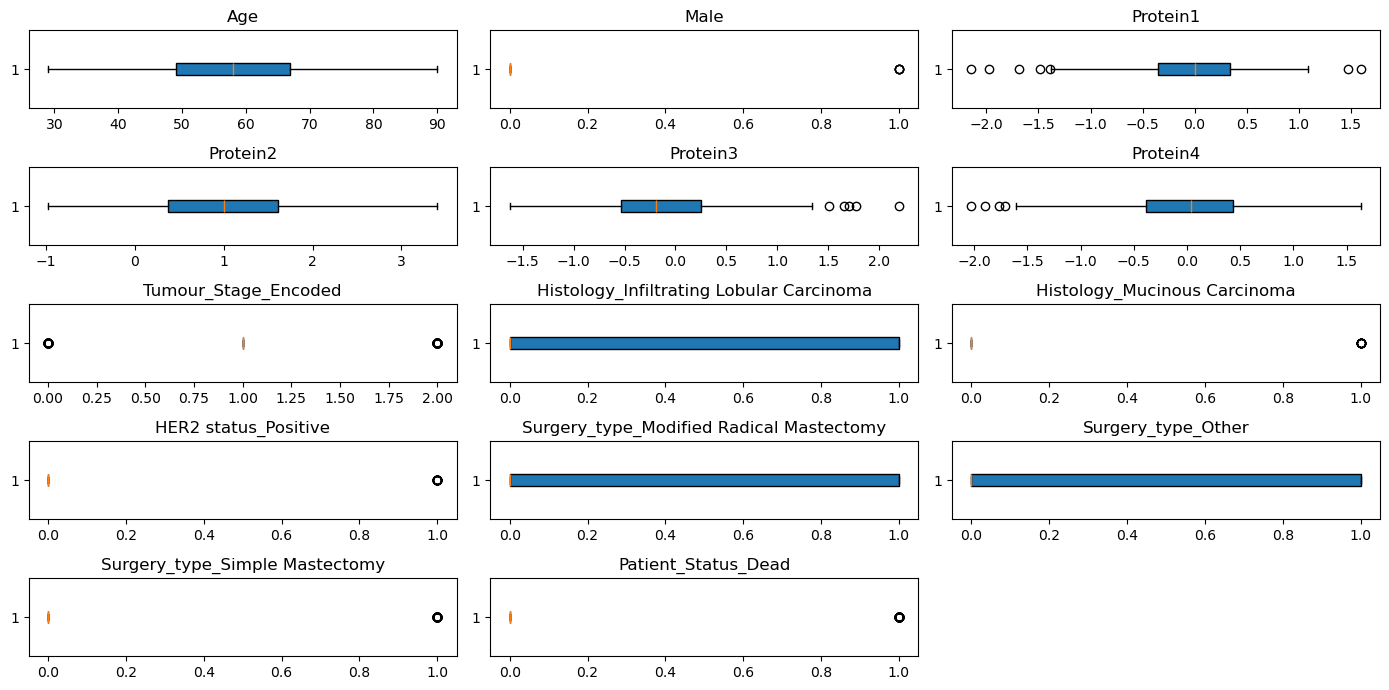

In [265]:
fig_bp,ax_bp=plt.subplots(nrows=5,ncols=3,figsize=(14,7))
ax_bp=ax_bp.flatten()
for i,col in enumerate(df.columns):
    ax_bp[i].boxplot(df[col],patch_artist=True,vert=False)
    ax_bp[i].set_title(col)
for i in range(len(df.columns),len(ax_bp)):
    ax_bp[i].axis('off')
plt.tight_layout()
plt.show()

In [267]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [269]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [271]:
X.head()

,Age,Male,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_Encoded,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,36.0,0.0,0.080353,0.42638,0.54715,0.273680,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,43.0,0.0,-0.420320,0.57807,0.61447,-0.031505,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,69.0,0.0,0.213980,1.31140,-0.32747,-0.234260,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56.0,0.0,0.345090,-0.21147,-0.19304,0.124270,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56.0,0.0,0.221550,1.90680,0.52045,-0.311990,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [273]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [275]:
x=scaler.fit_transform(X)

In [277]:
x=pd.DataFrame(x, columns=X.columns)

In [279]:
x.head()

,Age,Male,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_Encoded,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,0.114754,0.0,0.595194,0.320733,0.569135,0.628982,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.229508,0.0,0.461259,0.355358,0.586754,0.545493,0.5,0.0,1.0,0.0,0.0,0.0,0.0
2,0.655738,0.0,0.630940,0.522750,0.340225,0.490026,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.442623,0.0,0.666013,0.175136,0.375408,0.588108,0.5,0.0,0.0,0.0,1.0,0.0,0.0
4,0.442623,0.0,0.632965,0.658657,0.562147,0.468761,0.5,0.0,0.0,0.0,0.0,1.0,0.0


In [370]:
x.shape

(317, 13)

In [281]:
(x['Protein4'] < 0).any() # False
(X['Protein4'] < 0).any() #True

True

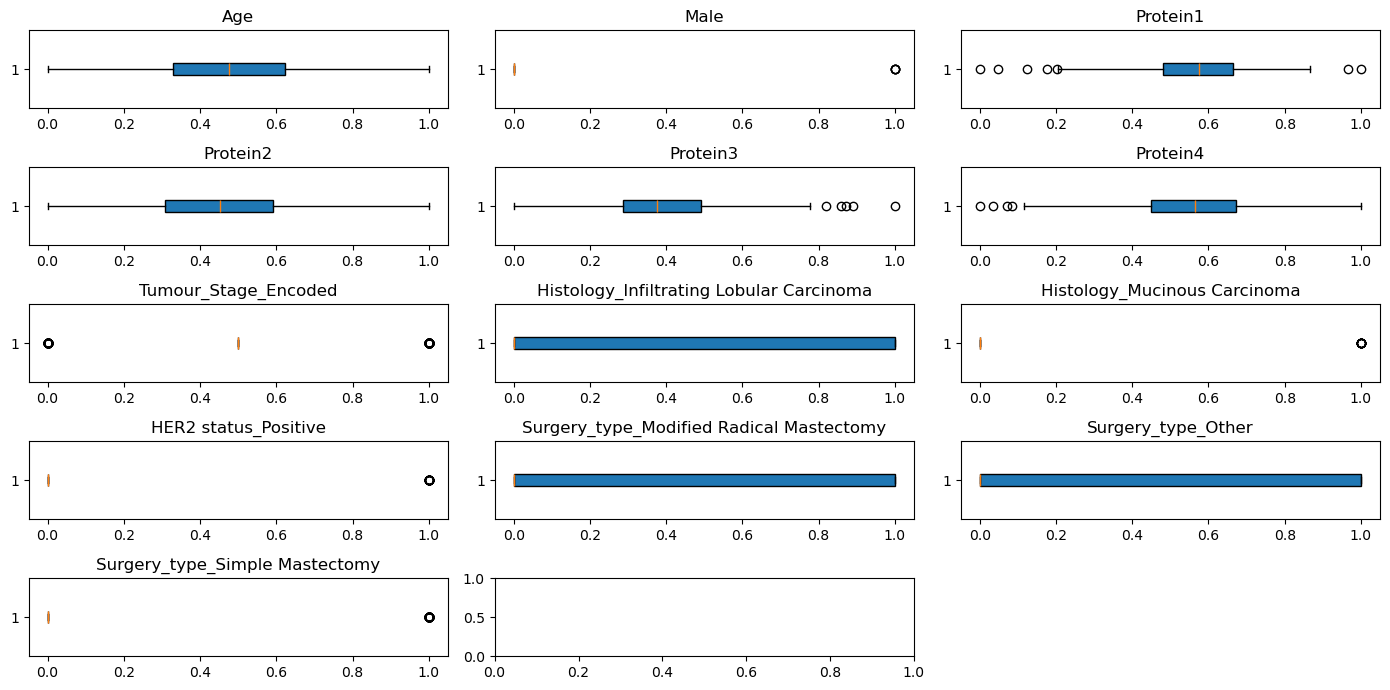

In [283]:
fig_bp,ax_bp=plt.subplots(nrows=5,ncols=3,figsize=(14,7))
ax_bp=ax_bp.flatten()
for i,col in enumerate(x.columns):
    ax_bp[i].boxplot(x[col],patch_artist=True,vert=False)
    ax_bp[i].set_title(col)
for i in range(len(df.columns),len(ax_bp)):
    ax_bp[i].axis('off')
plt.tight_layout()
plt.show()

In [285]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Patient_Status_Dead, dtype: float64

In [287]:
FIT_FEATURES=SelectKBest(score_func=chi2)

In [289]:
FIT_FEATURES.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x17910ef20>)

In [291]:
score=FIT_FEATURES.scores_

In [293]:
# Access the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': x.columns,
    'Score': FIT_FEATURES.scores_
})

# Display the feature scores
print(feature_scores)

                                     Feature     Score
0                                        Age  0.004416
1                                       Male  0.075285
2                                   Protein1  0.004632
3                                   Protein2  0.171898
4                                   Protein3  0.011991
5                                   Protein4  0.093449
6                       Tumour_Stage_Encoded  0.207964
7   Histology_Infiltrating Lobular Carcinoma  0.266323
8               Histology_Mucinous Carcinoma  0.225854
9                       HER2 status_Positive  0.612663
10  Surgery_type_Modified Radical Mastectomy  0.011827
11                        Surgery_type_Other  1.656811
12            Surgery_type_Simple Mastectomy  0.049702


In [297]:
feature_scores.nlargest(13,'Score')

,Feature,Score
11,Surgery_type_Other,1.656811
9,HER2 status_Positive,0.612663
7,Histology_Infiltrating Lobular Carcinoma,0.266323
8,Histology_Mucinous Carcinoma,0.225854
6,Tumour_Stage_Encoded,0.207964
3,Protein2,0.171898
5,Protein4,0.093449
1,Male,0.075285
12,Surgery_type_Simple Mastectomy,0.049702
4,Protein3,0.011991


In [299]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score

In [301]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [303]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC
svm=SVC()

In [305]:
import warnings
warnings.filterwarnings('ignore')

In [307]:
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_score_lr=cross_val_score(lr,x,y,cv=skf)

In [309]:
round(skf_score_lr.mean()*100,2)

80.45

In [311]:
skf_score_rf=cross_val_score(rf,x,y,cv=skf)
skf_score_dt=cross_val_score(dt,x,y,cv=skf)
skf_score_svm=cross_val_score(svm,x,y,cv=skf)

In [313]:
print(f'Accuracy for Ramdon Forest: {skf_score_rf.mean()*100:.2f}')
print(f'Accuracy for Decision Tree: {skf_score_dt.mean()*100:.2f}')
print(f'Accuracy for SVM {skf_score_svm.mean()*100:.2f}')

Accuracy for Ramdon Forest: 80.13
Accuracy for Decision Tree: 67.48
Accuracy for SVM 80.45


In [315]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=104)

In [317]:
lr.fit(X_train,y_train)

LogisticRegression()

In [319]:
y_pred_lr=lr.predict(X_test)

In [321]:
y_pred_lr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [323]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score

In [325]:
cm_lr=confusion_matrix(y_test,y_pred_lr)

In [327]:
cm_lr

array([[51,  0],
       [13,  0]])

In [329]:
y_test.value_counts()

Patient_Status_Dead
0.0    51
1.0    13
Name: count, dtype: int64

In [332]:
accuracy_lr=accuracy_score(y_test,y_pred_lr)
print(f'Accuracy for Logistic Regression: {accuracy_lr*100:.2f}')

Accuracy for Logistic Regression: 79.69


In [334]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [336]:
y_pred_rf=rf.predict(X_test)

In [338]:
y_pred_rf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [340]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[51,  0],
       [13,  0]])

In [342]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f'Accuracy for Random Forest: {accuracy_rf*100:.2f}')

Accuracy for Random Forest: 79.69


In [344]:
svm.fit(X_train,y_train)

SVC()

In [346]:
y_pred_svm=svm.predict(X_test)

In [348]:
accuracy_svm=accuracy_score(y_test,y_pred_svm)
print(f'Accuracy for SVM: {accuracy_svm*100:.2f}')

Accuracy for SVM: 79.69


In [350]:
y_pred_svm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [352]:
svm_2=SVC()

In [354]:
svm_2.fit(x,y)

SVC()

In [356]:
y_pred_svm_2=svm_2.predict(x)
accuracy_svm_2=accuracy_score(y,y_pred_svm_2)
print(f'Accuracy for SVM: {accuracy_svm_2*100:.2f}')

Accuracy for SVM: 80.44


In [358]:
cm_svm_2=confusion_matrix(y,y_pred_svm_2)
cm_svm_2

array([[255,   0],
       [ 62,   0]])

In [398]:
X_train.shape

(253, 13)

In [432]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)

In [434]:
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=13)

In [436]:
y_pred_knn=knn.predict(x)
accuracy_knn=accuracy_score(y,y_pred_knn)
print(f'Accuracy for KNN: {accuracy_knn*100:.2f}')

Accuracy for KNN: 80.76


In [438]:
cm_knn=confusion_matrix(y,y_pred_knn)
cm_knn

array([[252,   3],
       [ 58,   4]])

In [440]:
rf_2=RandomForestClassifier()
rf_2.fit(x,y)

RandomForestClassifier()

In [442]:
y_pred_rf_2=rf_2.predict(x)

In [444]:
cm_rf_2=confusion_matrix(y,y_pred_rf_2)
cm_rf_2

array([[255,   0],
       [  0,  62]])

In [448]:
accuracy_rf_2=accuracy_score(y,y_pred_rf_2)
print(f'Accuracy for Random forest with whole data: {accuracy_rf_2*100:.2f}%')

Accuracy for Random forest with whole data: 100.00%


In [450]:
dt_2=DecisionTreeClassifier()
dt_2.fit(x,y)

DecisionTreeClassifier()

In [452]:
y_pred_dt_2=dt_2.predict(x)

In [454]:
cm_dt_2=confusion_matrix(y,y_pred_dt_2)
cm_dt_2

array([[255,   0],
       [  0,  62]])